In [32]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import MDS, Isomap
from sklearn.manifold import LocallyLinearEmbedding as LLE
import glob
from PIL import Image
import cv2
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import warnings

# Methods definitions

In [33]:
def perform_pca(data, number_of_components, scale=False):
    
    if scale:
        scaler = StandardScaler()
        data = scaler.fit_transform(data)

    pca = PCA(n_components=number_of_components)
    components = pca.fit_transform(data)
    components_dataframe = pd.DataFrame(data=components)
    
    return components_dataframe, pca

def perform_kernel_pca(data, number_of_components, scale=False):
    
    if scale:
        scaler = StandardScaler()
        data = scaler.fit_transform(data)

    kpca = KernelPCA(kernel="rbf", n_components=number_of_components)
    components = kpca.fit_transform(data)
    components_dataframe = pd.DataFrame(data=components)
    
    return components_dataframe, kpca

def perform_mds(data, number_of_components, scale=False):
    # performing mds
    #MDS(n_components=2, metric=True, n_init=4, max_iter=300, verbose=0, 
    #eps=0.001, n_jobs=None, random_state=None, dissimilarity=’euclidean’)[source]
    
    if scale:
        scaler = StandardScaler()
        data = scaler.fit_transform(data)
    
    mds = MDS(n_components=number_of_components)
    components = mds.fit_transform(data)
    components_dataframe = pd.DataFrame(data=components)
    return components_dataframe, mds

def perform_isomap(data, number_of_components, number_of_neighbors, scale=False):
    
    if scale:
        scaler = StandardScaler()
        data = scaler.fit_transform(data)
    
    iso = Isomap(n_neighbors=number_of_neighbors,n_components=number_of_components)
    components = iso.fit_transform(data)
    components_dataframe = pd.DataFrame(data=components)
    return components_dataframe, iso

def perform_lle(data, number_of_components, number_of_neighbors, scale=False):
    
    if scale:
        scaler = StandardScaler()
        data = scaler.fit_transform(data)
    
    lle = LLE(n_neighbors=number_of_neighbors,n_components=number_of_components)
    components = lle.fit_transform(data)
    components_dataframe = pd.DataFrame(data=components)
    return components_dataframe, lle

# Display function

In [41]:
def display_data_with_colors(data, method_num=1, doScale=False,num_of_neighbors=5, dims=2, plot_kwargs={}):
    if method_num == 1:
        components_dataframe, pca = perform_pca(data, 2, scale=doScale)
        plt.title('PCA')
    elif method_num == 2:
        components_dataframe, kpca = perform_kernel_pca(data, 2, scale=doScale)
        plt.title('Kernel PCA')
    elif method_num == 3:
        components_dataframe, mds = perform_mds(data, 2, scale=doScale)
        plt.title('MDS')
    elif method_num == 4:
        components_dataframe, isomap = perform_isomap(data, 2, num_of_neighbors, scale=doScale)
        plt.title('Isomap')
    else:
        components_dataframe, lle = perform_lle(data, 2, num_of_neighbors, scale=doScale)
        plt.title('LLE')
        
    if dims == 2:
        plt.scatter(components_dataframe[0], components_dataframe[1], **plot_kwargs)
        plt.xlabel("PC 1")
        plt.ylabel("PC 2")  
        plt.show()
    
    elif dims == 3:
        ax = plt.axes(projection='3d')
        ax.scatter3D(components_dataframe[0], components_dataframe[1], components_dataframe[2], **plot_kwargs);
        ax.set_xlabel('PC 1')
        ax.set_ylabel('PC 2')
        ax.set_zlabel('PC 3')
        plt.show()
    return

# Data preparation

In [42]:
names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
df = pd.read_csv('datasets/iris.csv', names=names)
data = df.iloc[:, :4] # extracting all rows, first 4 columns (skipping 'class' column)
data.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [43]:
# %matplotlib notebook
colors_dict = {
    'Iris-setosa': 'red',
    'Iris-versicolor': 'blue',
    'Iris-virginica': 'yellow'
}

colors = [colors_dict[c] for c in df['class']]
plot_setting = {
    's': 12,
    'c': colors
}

# Display without scaling

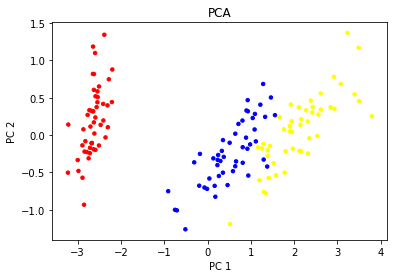

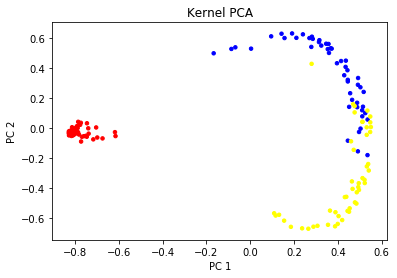

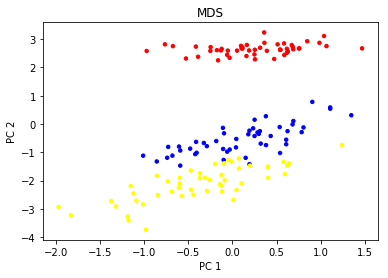

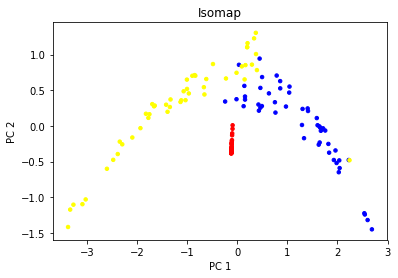

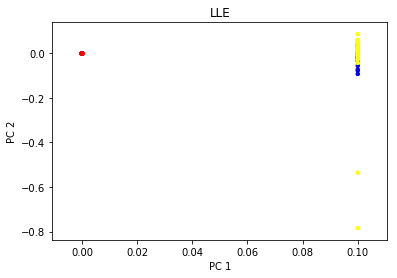

In [44]:
display_data_with_colors(data,method_num=1, dims=2, plot_kwargs=plot_setting) #pca
display_data_with_colors(data,method_num=2, dims=2,plot_kwargs=plot_setting) #kernel pca
display_data_with_colors(data,method_num=3, dims=2,plot_kwargs=plot_setting) #mds
display_data_with_colors(data,method_num=4, dims=2,plot_kwargs=plot_setting) #isomap
display_data_with_colors(data,method_num=5, dims=2,plot_kwargs=plot_setting) #lle

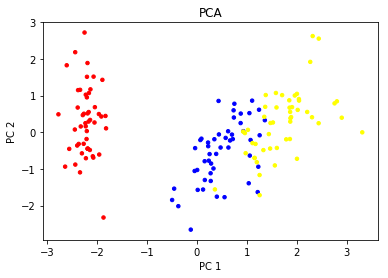

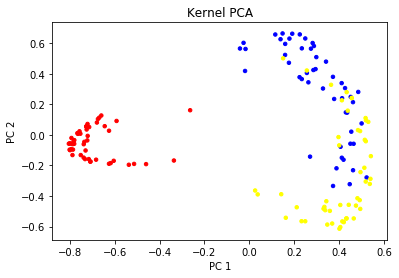

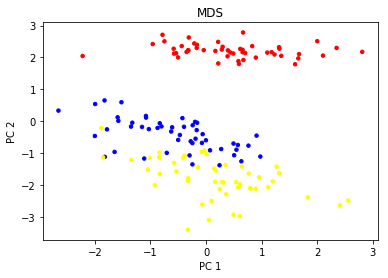

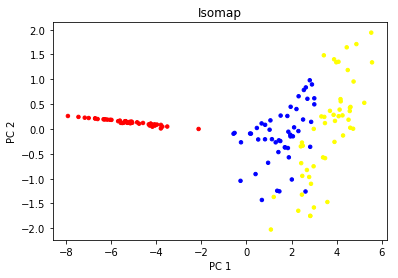

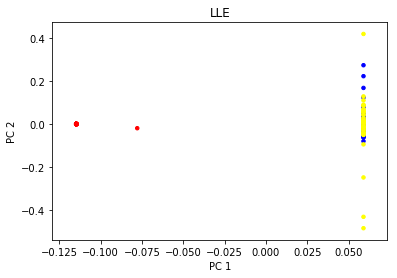

In [45]:
display_data_with_colors(data,method_num=1, doScale=True, dims=2, plot_kwargs=plot_setting) #pca
display_data_with_colors(data,method_num=2, doScale=True, dims=2,plot_kwargs=plot_setting) #kernel pca
display_data_with_colors(data,method_num=3, doScale=True, dims=2,plot_kwargs=plot_setting) #mds
display_data_with_colors(data,method_num=4, doScale=True, dims=2,plot_kwargs=plot_setting) #isomap
display_data_with_colors(data,method_num=5, doScale=True, dims=2,plot_kwargs=plot_setting) #lle